In [2]:
# Import libraries
import math
import pandas_datareader as web
import  numpy as np
import pandas as pd 
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential 
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
# description: this program uses an artificial neural network called lon short Term Memory (LSTM)
#           to prsedict the closing stock price of corporation(Apple Inc.) using the past 60 day stock price.

In [11]:
pip install tensorflow

     |████████████████████████████████| 394.4 MB 1.8 kB/s eta 0:00:01    |███████▋                        | 94.2 MB 1.9 MB/s eta 0:02:41     |████████                        | 97.9 MB 3.5 MB/s eta 0:01:24     |█████████▌                      | 116.6 MB 727 kB/s eta 0:06:22     |█████████▊                      | 119.5 MB 411 kB/s eta 0:11:08     |█████████████████▍              | 214.1 MB 1.1 MB/s eta 0:02:38
     |████████████████████████████████| 462 kB 338 kB/s eta 0:00:01
     |████████████████████████████████| 42 kB 143 kB/s eta 0:00:01
     |████████████████████████████████| 57 kB 455 kB/s eta 0:00:01
     |████████████████████████████████| 1.0 MB 518 kB/s eta 0:00:01
     |████████████████████████████████| 3.8 MB 743 kB/s eta 0:00:01
     |████████████████████████████████| 65 kB 317 kB/s eta 0:00:01
     |████████████████████████████████| 129 kB 1.4 MB/s eta 0:00:01
     |████████████████████████████████| 10.6 MB 213 kB/s eta 0:00:01    |█████████████████████████████▌  | 9.8 MB 1

In [3]:
#Get the stock quote
df  = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-08')
#Show the data
df

ConnectionError: HTTPSConnectionPool(host='finance.yahoo.com', port=443): Max retries exceeded with url: /quote/AAPL/history?period1=1325383200&period2=1617933599&interval=1d&frequency=1d&filter=history (Caused by NewConnectionError('<urllib3.connection.HTTPSConnection object at 0x7f49dca86610>: Failed to establish a new connection: [Errno -3] Temporary failure in name resolution'))

In [ ]:
#Get the number of row and columns in data set
df.shape

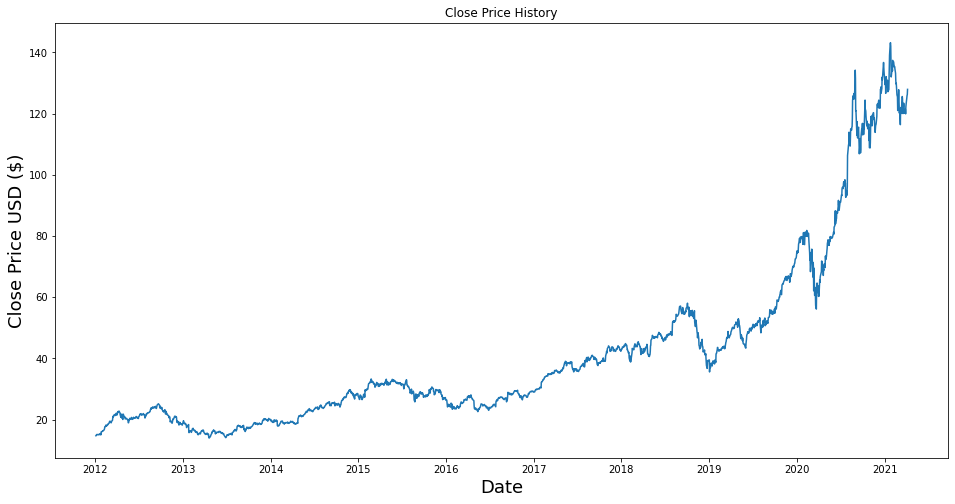

In [3]:
#visualize the closing price history
plt.figure(figsize=(16, 8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [4]:
#Creating a new dataframe with only the 'Close column'
data = df.filter(['Close'])
#Convert the dataframe to a numpy array
dataset = data.values
#Get the number of rows to train the model on
training_data_len = math.ceil( len(dataset) * .8 )

training_data_len


1864

In [5]:
#Scale the data before entered in neural network
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)
    
scaled_data

array([[0.00572147],
       [0.00633231],
       [0.00760099],
       ...,
       [0.86642158],
       [0.86882071],
       [0.88189996]])

In [6]:
#Create the training data set
#Create the scaled the training data set
train_data = scaled_data[0:training_data_len , :]
#Split the data into x_train and y_train data sets
x_train = []
y_train = []

for i in range(60, len(train_data)):
    x_train.append(train_data[i-60:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 61:
        print(x_train)
        print(y_train)
        print()

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00822841, 0.01019361, 0.00825882,
       0.01551431, 0.01495322, 0.01568568, 0.01726944, 0.01822855,
       0.01814839, 0.01785265, 0.01911303, 0.02029878, 0.02164209,
       0.02381183, 0.02836966, 0.02843875, 0.03097611, 0.0328722 ,
       0.02961346, 0.03086831, 0.03084343, 0.034362  , 0.03386171,
       0.03478765, 0.03645157, 0.03737752, 0.04004478, 0.04198786,
       0.04254895, 0.0427452 , 0.03942288, 0.03862131, 0.03874017,
       0.04186349, 0.04274244, 0.04463025, 0.04908028, 0.05501734,
       0.05390621, 0.05390897, 0.05820147, 0.05954478, 0.05858842,
       0.05771501, 0.05680565, 0.05982669, 0.0618997 , 0.06276759])]
[0.06062272301844436]

[array([0.00572147, 0.00633231, 0.00760099, 0.00880885, 0.00862367,
       0.00904103, 0.00885031, 0.00852969, 0.00809297, 0.00944457,
       0.0106635 , 0.01028759, 0.00

In [7]:
#Convert the x_train and y_train to numpy arrays to train the LSTM model
x_train , y_train = np.array(x_train), np.array(y_train)


In [8]:
#Reshape the x data set to 3D (expected)
x_train  = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape


(1804, 60, 1)

In [9]:
#Build the LSTM model 
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape= (x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences= False))
model.add(Dense(25))
model.add(Dense(1))

In [10]:
#Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

In [11]:
#Train the model
model.fit(x_train, y_train, batch_size=1, epochs=1)

1804/1804 [==============================] - 49s 25ms/step - loss: 5.6603e-04


In [12]:
#Create the testing data set
#Create a new array containing scaled values from index 1802 to 2003
test_data = scaled_data[training_data_len - 60: , :]
#Create the data sets x_tests and y_tests
x_test = []
y_test = dataset[training_data_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])
    

In [13]:
#Convert the data into a numpy array
x_test = np.array(x_test)

In [14]:
#Reshape the data 
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))


In [15]:
#Get the models predicted price values
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)

In [16]:
#Get the root mean squared error(RMSE)
rmse = np.sqrt( np.mean( predictions - y_test)**2)
rmse

1.5627645484367665

<ipython-input-17-b5d1a35ab357>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


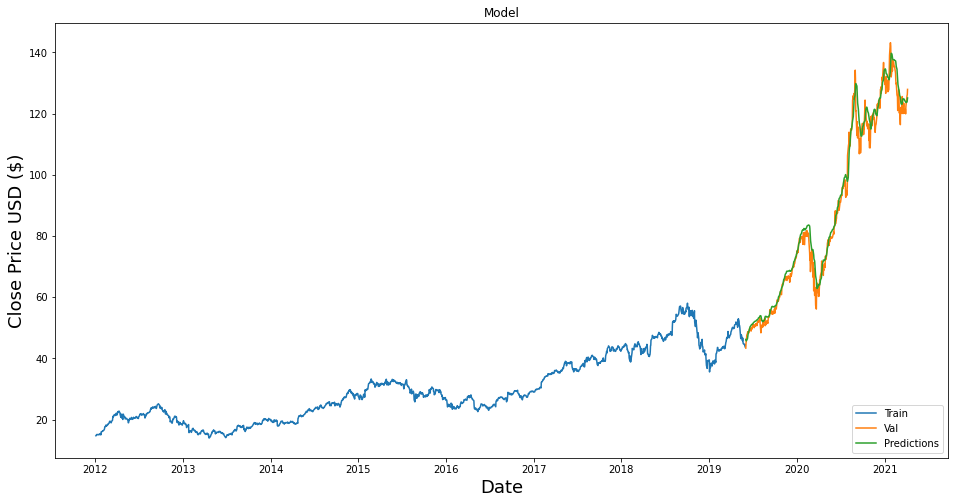

In [17]:
#Plot the data
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#Visualise the model/data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [18]:
#Show the valid and the predicted prices
valid

,Close,Predictions
Date,,
2019-06-03,43.325001,46.181416
2019-06-04,44.910000,45.844090
2019-06-05,45.634998,45.703156
2019-06-06,46.305000,45.757290
2019-06-07,47.537498,45.981895
...,...,...
2021-03-31,122.150002,123.626488
2021-04-01,123.000000,123.603020
2021-04-05,125.900002,123.778885


In [1]:
#Get the quote (predict via date)
apple_quote = web.DataReader('AAPL', data_source='yahoo', start='2012-01-01', end='2021-04-09')
#Create a dataframe 
new_df = apple_quote.filter(['Close'])
#Get the last 60 days closing price values and convert the dataframe to an array
last_60_days = new_df[-60:].values
#Scale the data to be values between 0 and 1
last_60_days_scaled = scaler.transform(last_60_days)
#Create an empty list 
x_test = []
#Append the past 60 days
x_test.append(last_60_days_scaled)
#Convert the x_test data set to a numpy array
x_test = np.array(x_test)
#Reshape the data
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape [1], 1))
#Get the predicted scaled price
pred_price = model.predict(x_test)
#undo the scaling
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)


NameError: name 'web' is not defined

In [23]:
#Get the quote (actual compare)
apple_quote2 = web.DataReader('AAPL', data_source='yahoo', start='2012-04-08', end='2021-04-08')
print(apple_quote2['Close'])

Date
2012-04-09     22.722500
2012-04-10     22.444286
2012-04-11     22.364286
2012-04-12     22.241785
2012-04-13     21.615356
                 ...    
2021-03-31    122.150002
2021-04-01    123.000000
2021-04-05    125.900002
2021-04-06    126.209999
2021-04-07    127.900002
Name: Close, Length: 2264, dtype: float64
